# About Dataset

Clustering the Countries by using Unsupervised Learning for HELP International


## Objective:

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:

An organization, having secured approximately $10 million in funds, is at a pivotal juncture where its leadership, represented by the CEO, must deliberate on the most prudent and impactful allocation of these resources. Specifically, the CEO is tasked with identifying countries experiencing acute humanitarian needs in order to provide targeted assistance. In this context, your role as a data scientist is to employ socio-economic and health-related indicators to categorize countries according to their overall development status. Subsequently, you are expected to recommend the countries that warrant the greatest attention from the CEO.

### The dataset contains the following features:

country: Name of the country.

child_mort:	Death of children under 5 years of age per 1000 live births.

exports: Exports of goods and services per capita. Given as %age of the GDP per capita.

health: Total health spending per capita. Given as %age of GDP per capita.

imports: Imports of goods and services per capita. Given as %age of the GDP per capita.

Income:	Net income per person.

Inflation: The measurement of the annual growth rate of the Total GDP.

life_expec:	The average number of years a new born child would live if the current mortality patterns are to remain the same.

total_fer:	The number of children that would be born to each woman if the current age-fertility rates remain the same.

gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population.

In [1]:
# Importing required Libraries

import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
sns.set_style('whitegrid')

In [2]:
# Loading the dataset

df = pd.read_csv('Country-data.csv')

In [3]:
# Columns present in the dataset

df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [4]:
# Renaming the Column names:

df = df.rename(columns = {'country':'Country', 'child_mort':'Child_Mortality_Rate', 'exports':'Exports', 'health':'Health', 
                          'imports':'Imports','income':'Income', 'inflation':'Inflation',
                     'life_expec':'Life_Expectancy', 'total_fer':'Fertility_Rate', 'gdpp':'GDP'})

In [5]:
# Since Exports, Health, Imports are given as percentage of GDP per capita, in order to get the true values of the same:

df[['Exports', 'Health', 'Imports']] = round(df[['Exports', 'Health', 'Imports']].multiply(df['GDP']/100, axis = 'index'),3)

In [6]:
# Checking the first 10 rows

df.head(10)

Country  Child_Mortality_Rate   Exports    Health    Imports  \
0          Afghanistan                  90.2     55.30    41.917    248.297   
1              Albania                  16.6   1145.20   267.895   1987.740   
2              Algeria                  27.3   1712.64   185.982   1400.440   
3               Angola                 119.0   2199.19   100.605   1514.370   
4  Antigua and Barbuda                  10.3   5551.00   735.660   7185.800   
5            Argentina                  14.5   1946.70   834.300   1648.000   
6              Armenia                  18.1    669.76   141.680   1458.660   
7            Australia                   4.8  10276.20  4530.870  10847.100   
8              Austria                   4.3  24059.70  5159.000  22418.200   
9           Azerbaijan                  39.2   3171.12   343.392   1208.880   

   Income  Inflation  Life_Expectancy  Fertility_Rate    GDP  
0    1610      9.440             56.2            5.82    553  
1    9930      4.490             76.3            1.65   4090  
2   12900     16.100             76.5            2.89   4460  
3    5900     22.400             60.1            6.16   3530  
4   19100      1.440             76.8            2.13  12200  
5   18700     20.900             75.8            2.37  10300  
6    6700      7.770             73.3            1.69   3220  
7   41400      1.160             82.0            1.93  51900  
8   43200      0.873             80.5            1.44  46900  
9   16000     13.800             69.1            1.92   5840

In [7]:
# Checking the last 10 rows

df.tail(10)

Country  Child_Mortality_Rate   Exports    Health   Imports  \
157  United Arab Emirates                   8.6  27195.00  1281.000  22260.00   
158        United Kingdom                   5.2  10969.80  3749.960  11981.20   
159         United States                   7.3   6001.60  8663.600   7647.20   
160               Uruguay                  10.6   3129.70   993.650   3022.60   
161            Uzbekistan                  36.3    437.46    80.178    393.30   
162               Vanuatu                  29.2   1384.02   155.925   1565.19   
163             Venezuela                  17.1   3847.50   662.850   2376.00   
164               Vietnam                  23.3    943.20    89.604   1050.62   
165                 Yemen                  56.3    393.00    67.858    450.64   
166                Zambia                  83.1    540.20    85.994    451.14   

     Income  Inflation  Life_Expectancy  Fertility_Rate    GDP  
157   57600      12.50             76.5            1.87  35000  
158   36200       1.57             80.3            1.92  38900  
159   49400       1.22             78.7            1.93  48400  
160   17100       4.91             76.4            2.08  11900  
161    4240      16.50             68.8            2.34   1380  
162    2950       2.62             63.0            3.50   2970  
163   16500      45.90             75.4            2.47  13500  
164    4490      12.10             73.1            1.95   1310  
165    4480      23.60             67.5            4.67   1310  
166    3280      14.00             52.0            5.40   1460

In [8]:
# Checking the number of rows and columns.

print('Total number of observations/rows are:',df.shape[0])
print('Total number of features/columns are:',df.shape[1])

Total number of observations/rows are: 167
Total number of features/columns are: 10


In [9]:
# Checking the basic info of the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               167 non-null    object 
 1   Child_Mortality_Rate  167 non-null    float64
 2   Exports               167 non-null    float64
 3   Health                167 non-null    float64
 4   Imports               167 non-null    float64
 5   Income                167 non-null    int64  
 6   Inflation             167 non-null    float64
 7   Life_Expectancy       167 non-null    float64
 8   Fertility_Rate        167 non-null    float64
 9   GDP                   167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [10]:
# Checking the data description of all the variables, which gives us the count, mean, std, minimum, 25th quartile, 
# median, 75th quartile and maximum values in the respective numerical columns.

df.describe().T

count          mean           std      min        25%  \
Child_Mortality_Rate  167.0     38.270060     40.328931    2.600     8.2500   
Exports               167.0   7420.618850  17973.885794    1.077   447.1400   
Health                167.0   1056.733198   1801.408909   12.821    78.5355   
Imports               167.0   6588.352108  14710.810418    0.651   640.2150   
Income                167.0  17144.688623  19278.067698  609.000  3355.0000   
Inflation             167.0      7.781832     10.570704   -4.210     1.8100   
Life_Expectancy       167.0     70.555689      8.893172   32.100    65.3000   
Fertility_Rate        167.0      2.947964      1.513848    1.150     1.7950   
GDP                   167.0  12964.155689  18328.704809  231.000  1330.0000   

                           50%       75%        max  
Child_Mortality_Rate    19.300     62.10     208.00  
Exports               1777.440   7278.00  183750.00  
Health                 321.886    976.94    8663.60  
Imports               2045.580   7719.60  149100.00  
Income                9960.000  22800.00  125000.00  
Inflation                5.390     10.75     104.00  
Life_Expectancy         73.100     76.80      82.80  
Fertility_Rate           2.410      3.88       7.49  
GDP                   4660.000  14050.00  105000.00

In [11]:
# Before Starting the Exploratory Data Analysis, Seeing how the data values look like for all the observations:

for i in df.columns:
    print('*'*50, i, '*'*50)
    print('\n')
    print(set(df[i].to_list()))
    print('\n')

************************************************** Country **************************************************


{'Chad', 'Malta', 'Oman', 'Lebanon', 'Togo', 'Canada', 'Pakistan', 'Cape Verde', 'Bhutan', 'Seychelles', 'Dominican Republic', 'Ghana', 'France', 'Malawi', 'Russia', 'Namibia', 'Lithuania', 'Qatar', 'Guinea-Bissau', 'Myanmar', 'Norway', 'Ecuador', 'Mali', 'Venezuela', 'Equatorial Guinea', 'Denmark', 'Guatemala', 'Estonia', 'Kazakhstan', 'Ukraine', 'Netherlands', 'Hungary', 'Cameroon', 'Indonesia', 'Azerbaijan', 'Tajikistan', 'Lao', 'Samoa', 'Suriname', 'Eritrea', 'Fiji', 'Greece', 'Benin', 'Tunisia', 'Burundi', 'Armenia', 'Ireland', 'Japan', 'Belize', 'Romania', 'Sweden', 'El Salvador', 'United States', 'Turkey', 'Lesotho', 'Kenya', 'Antigua and Barbuda', "Cote d'Ivoire", 'Mozambique', 'Portugal', 'Singapore', 'Tonga', 'Slovak Republic', 'Bangladesh', 'Croatia', 'Bahamas', 'Israel', 'Rwanda', 'Colombia', 'Kiribati', 'United Arab Emirates', 'Cyprus', 'Argentina', 'Iraq', 'Mold

# Exploratory Data Analysis

## Univariate Analysis of the features

In [12]:
df.columns[1:]

Index(['Child_Mortality_Rate', 'Exports', 'Health', 'Imports', 'Income',
       'Inflation', 'Life_Expectancy', 'Fertility_Rate', 'GDP'],
      dtype='object')

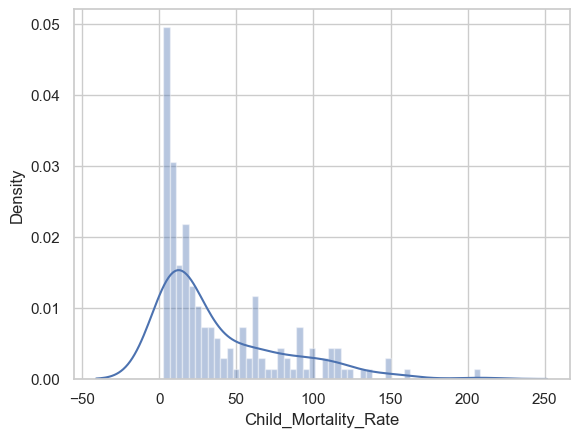

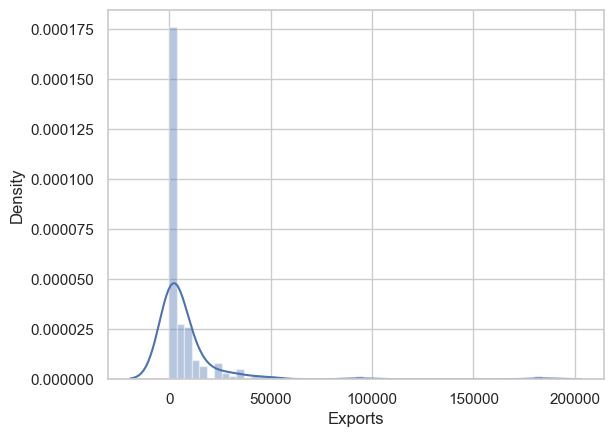

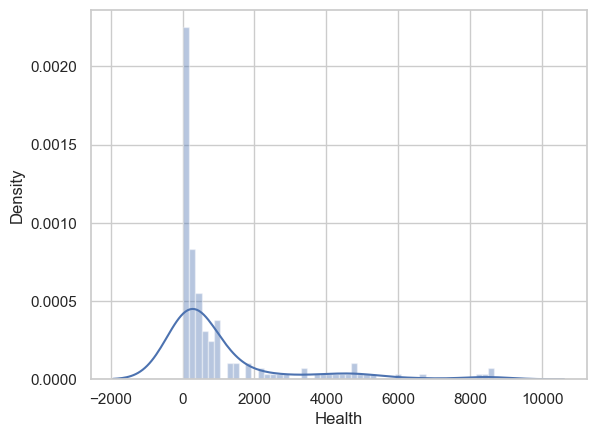

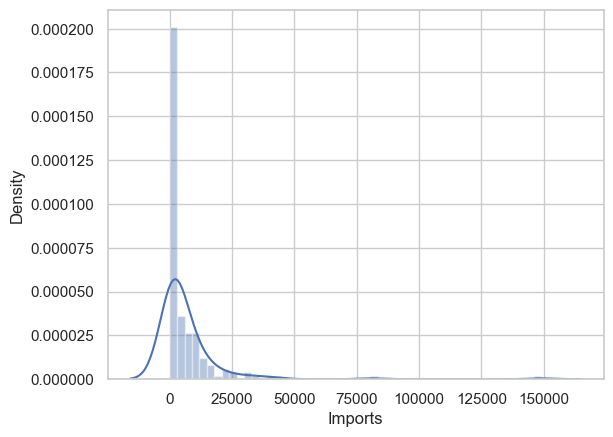

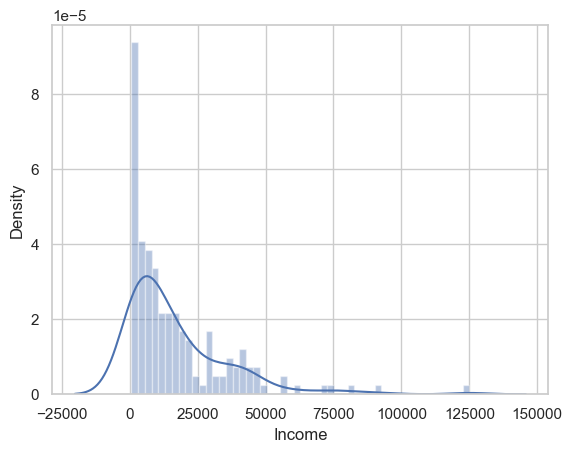

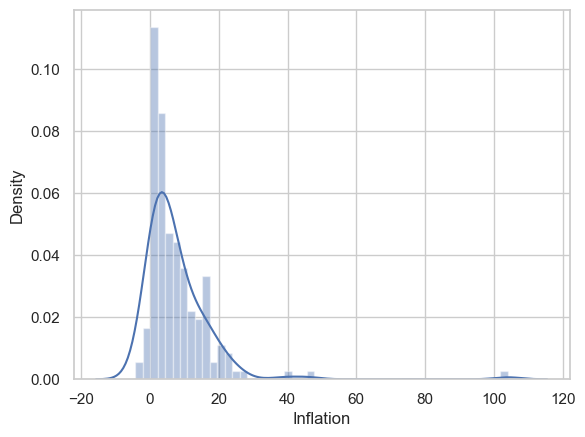

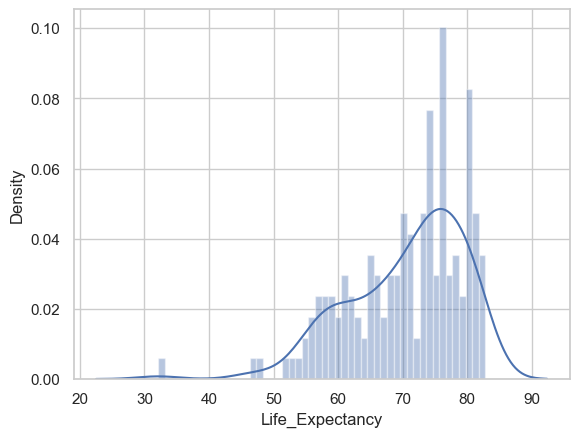

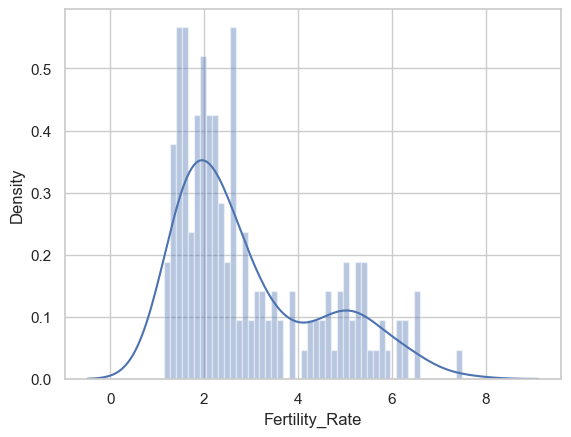

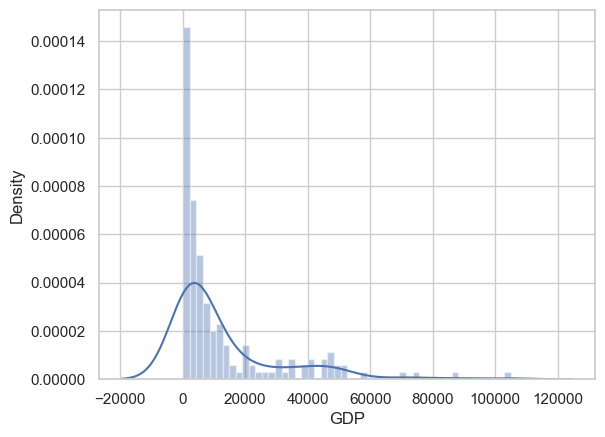

In [13]:
# Checking the feature Delinquent

for cols in df.columns[1:]:
    sns.distplot(df[cols], kde=True, bins = 50)
    plt.show()

In [14]:
df.columns

Index(['Country', 'Child_Mortality_Rate', 'Exports', 'Health', 'Imports',
       'Income', 'Inflation', 'Life_Expectancy', 'Fertility_Rate', 'GDP'],
      dtype='object')

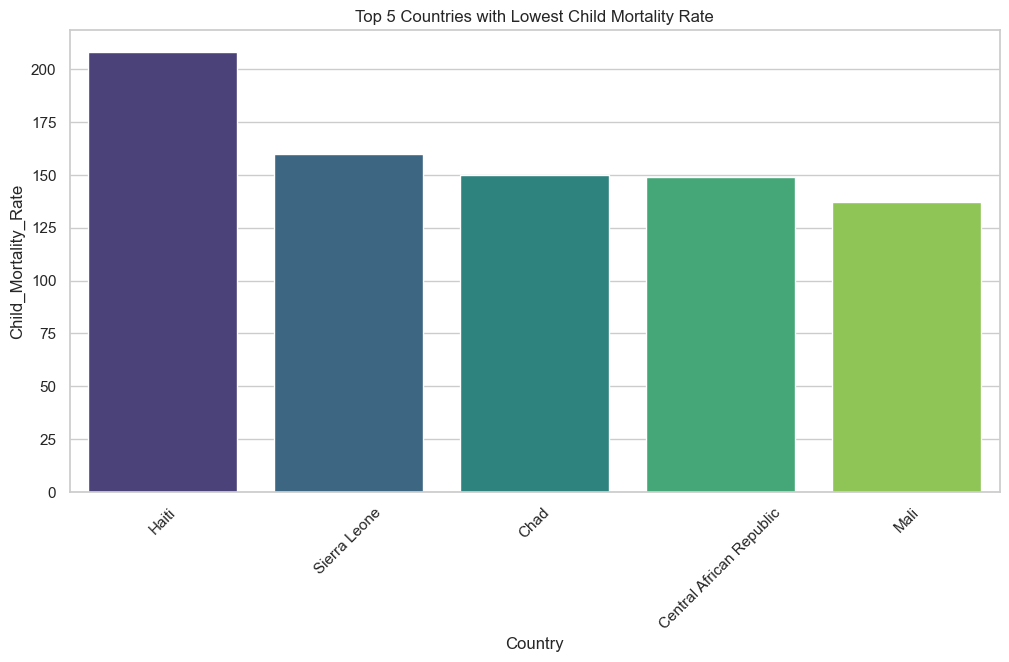

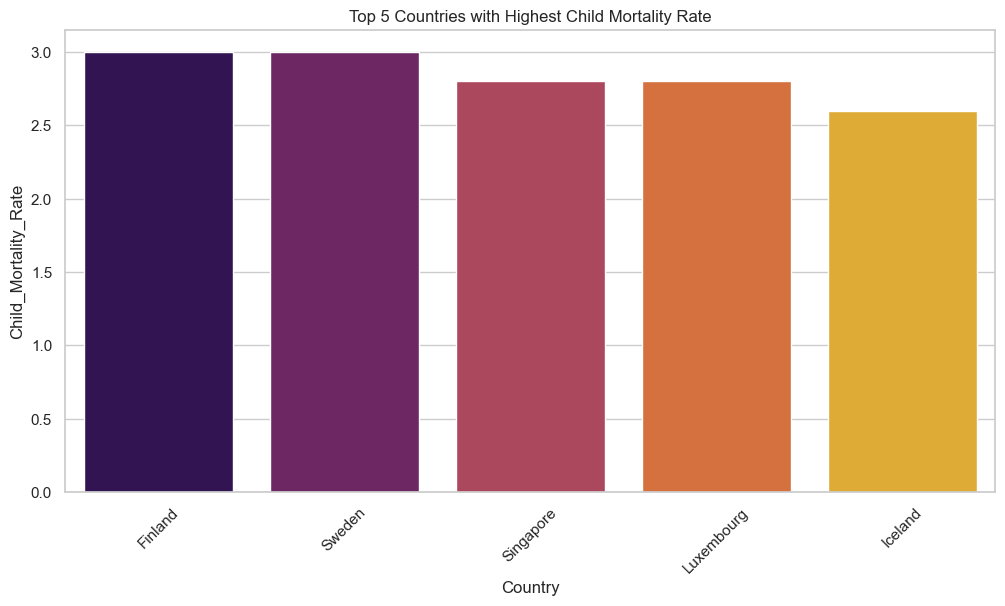

In [15]:
df_sorted = df.sort_values(by='Child_Mortality_Rate', ascending=False)
first_five = df_sorted.head()
last_five = df_sorted.tail()
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Child_Mortality_Rate', data=first_five, palette='viridis')
plt.title('Top 5 Countries with Lowest Child Mortality Rate')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Child_Mortality_Rate', data=last_five, palette='inferno')
plt.title('Top 5 Countries with Highest Child Mortality Rate')
plt.xticks(rotation=45)
plt.show()

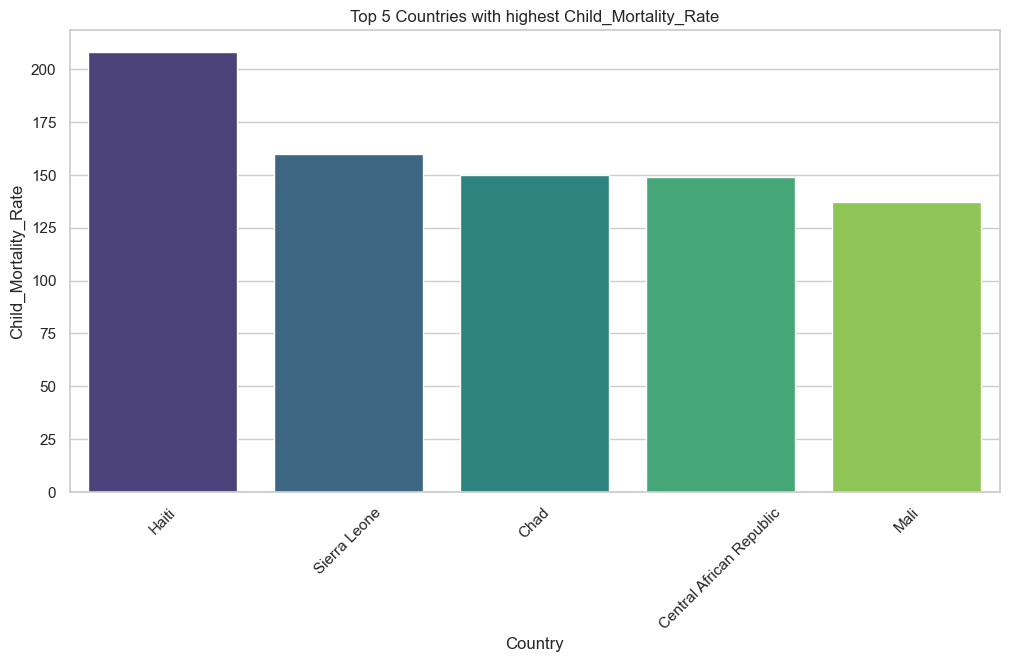

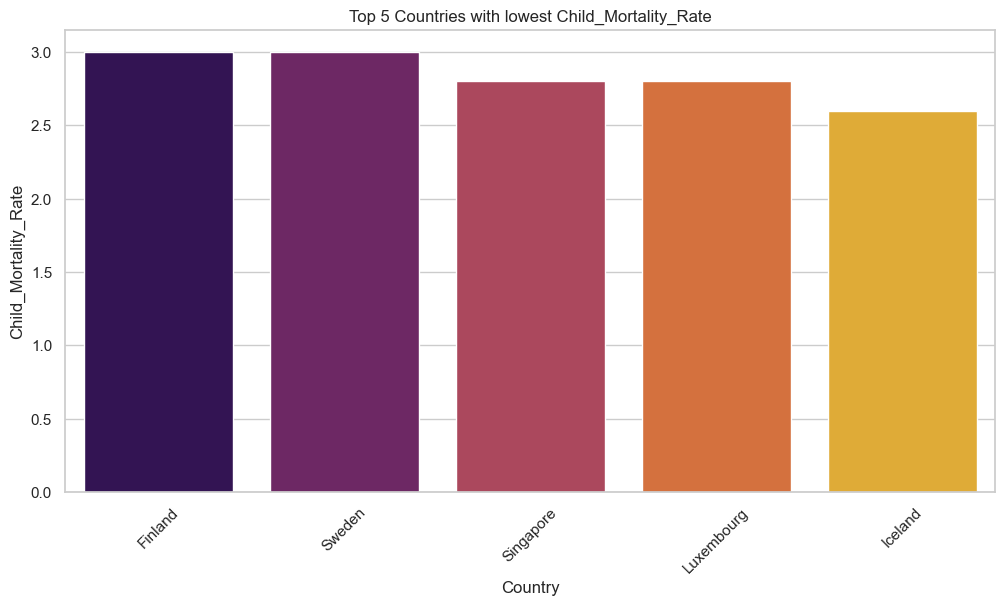

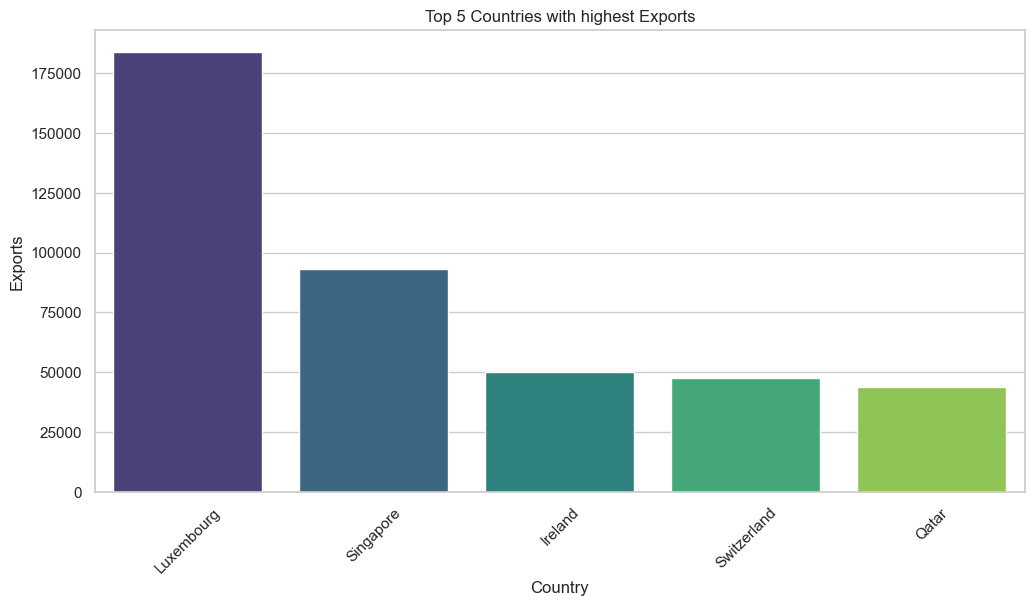

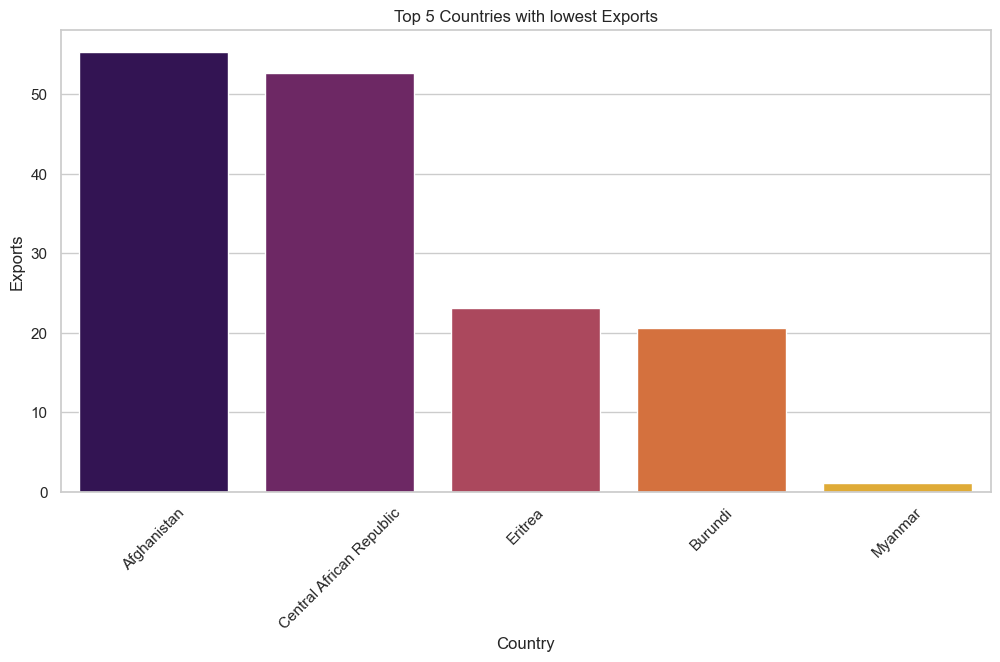

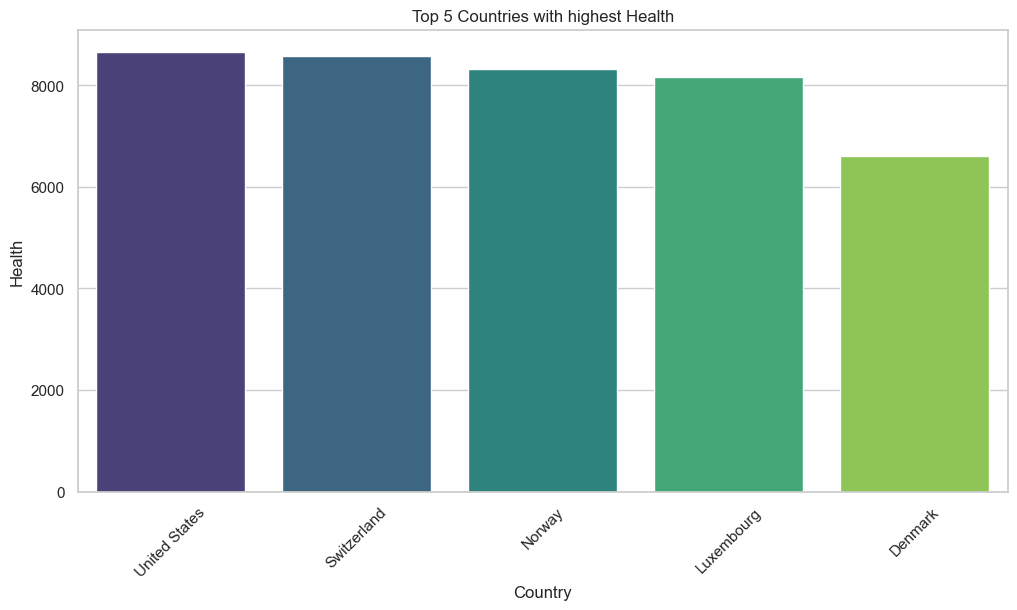

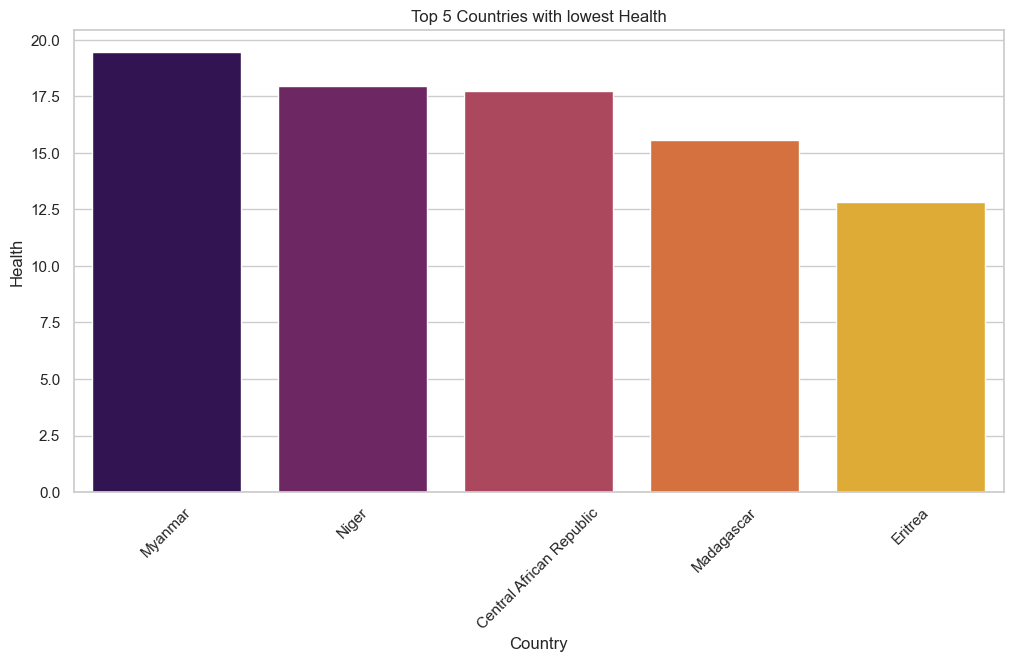

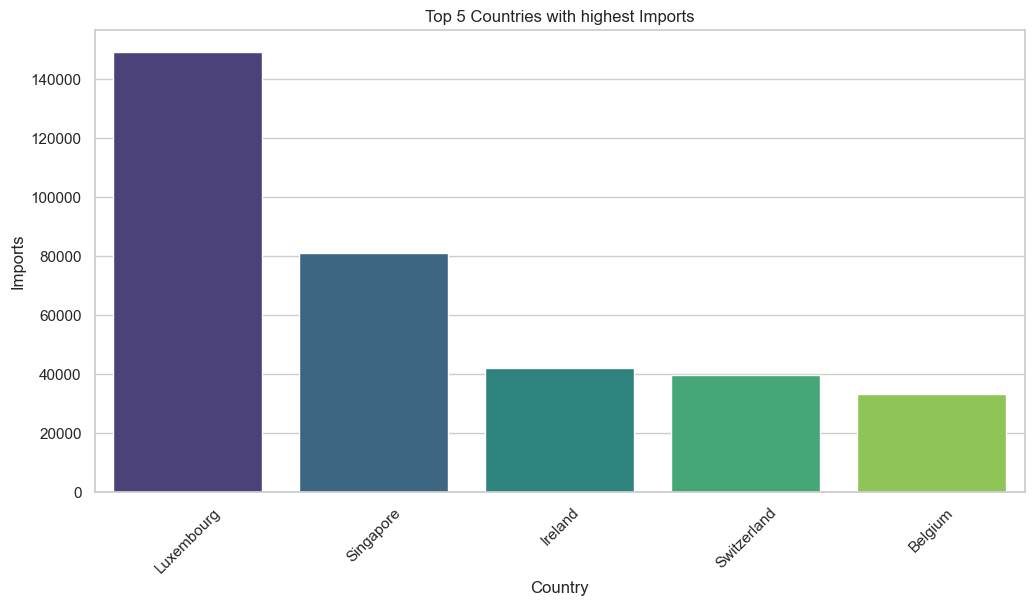

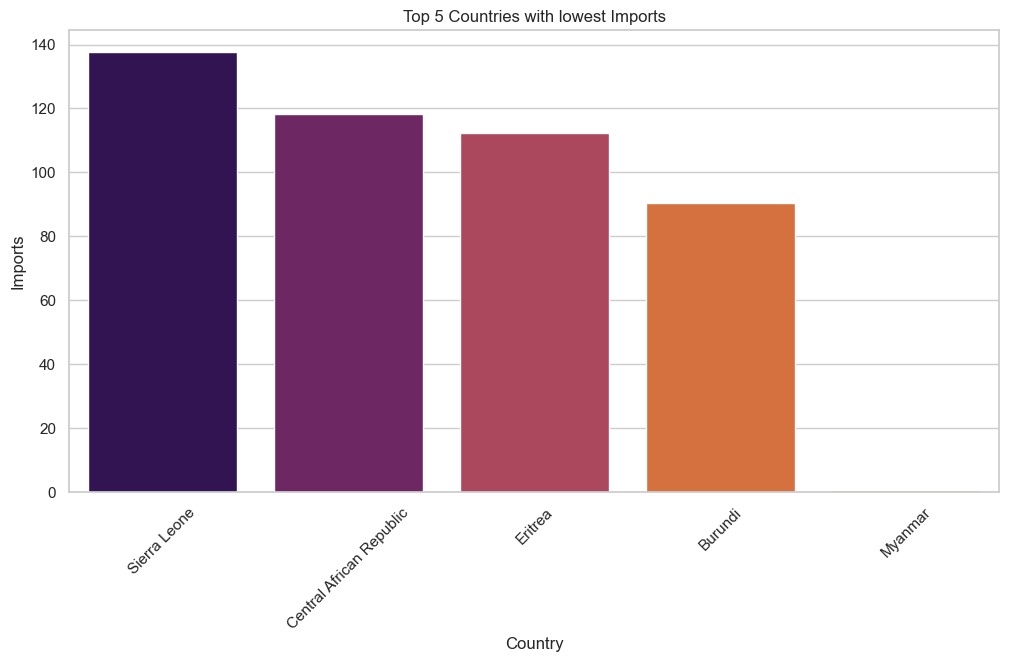

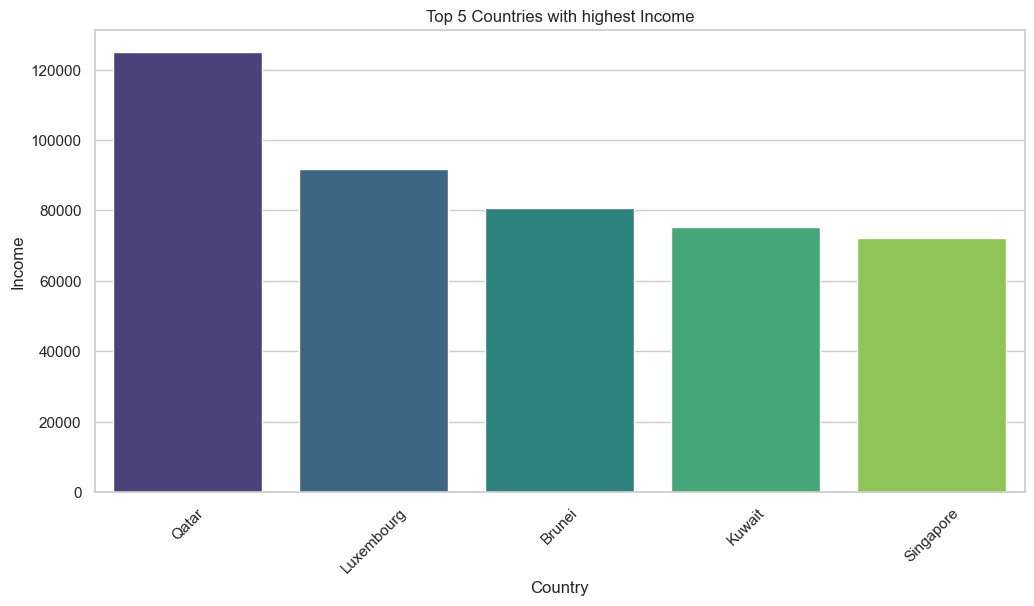

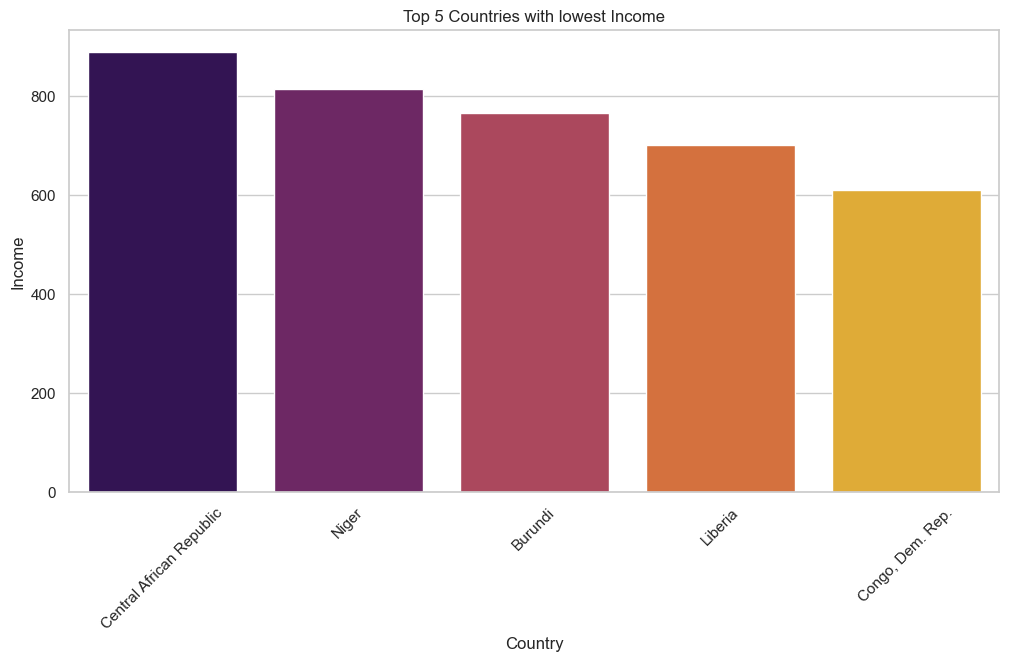

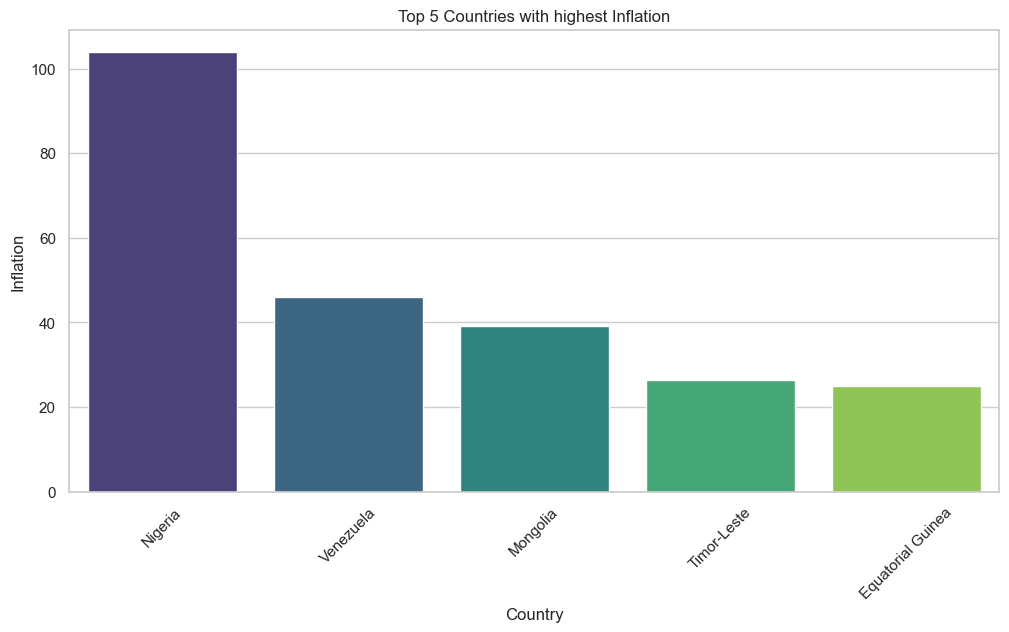

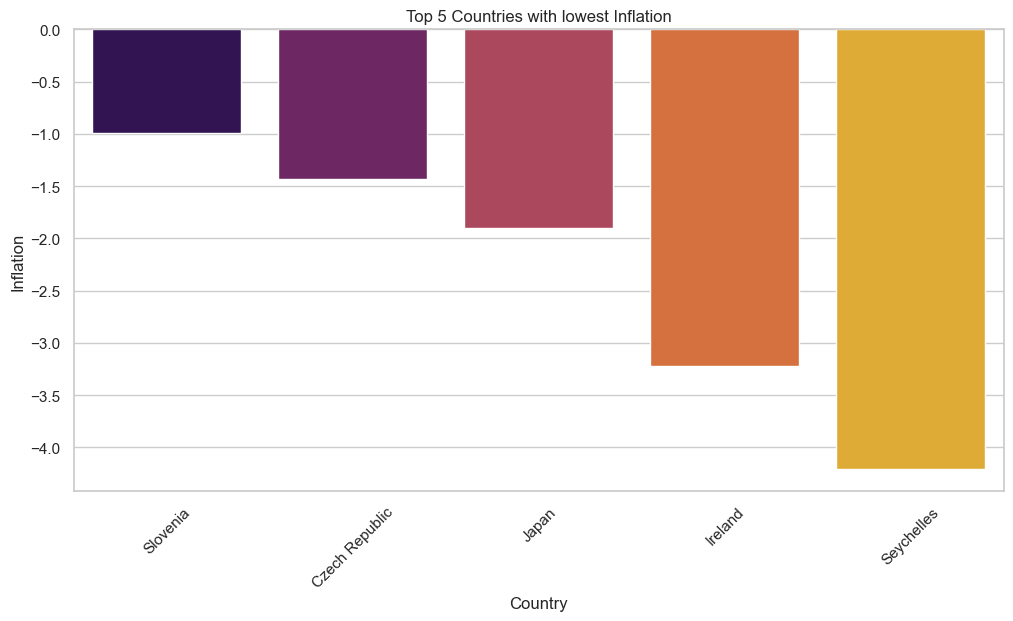

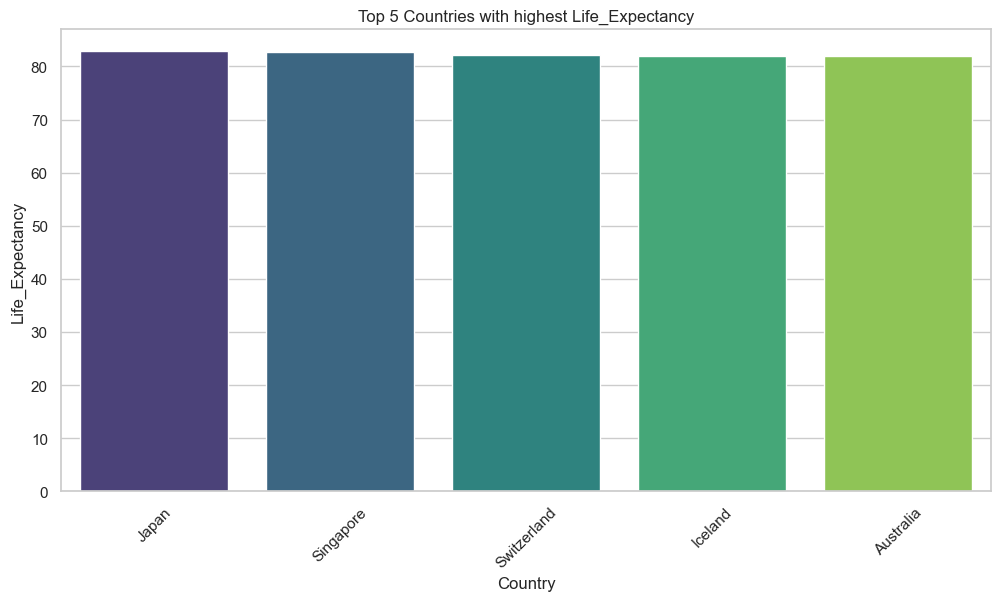

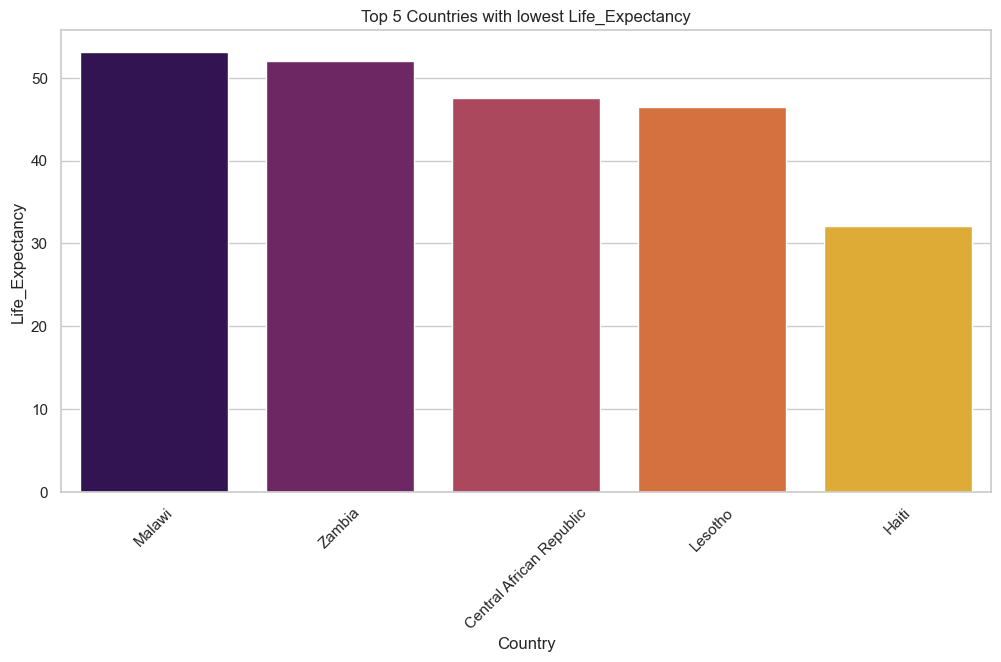

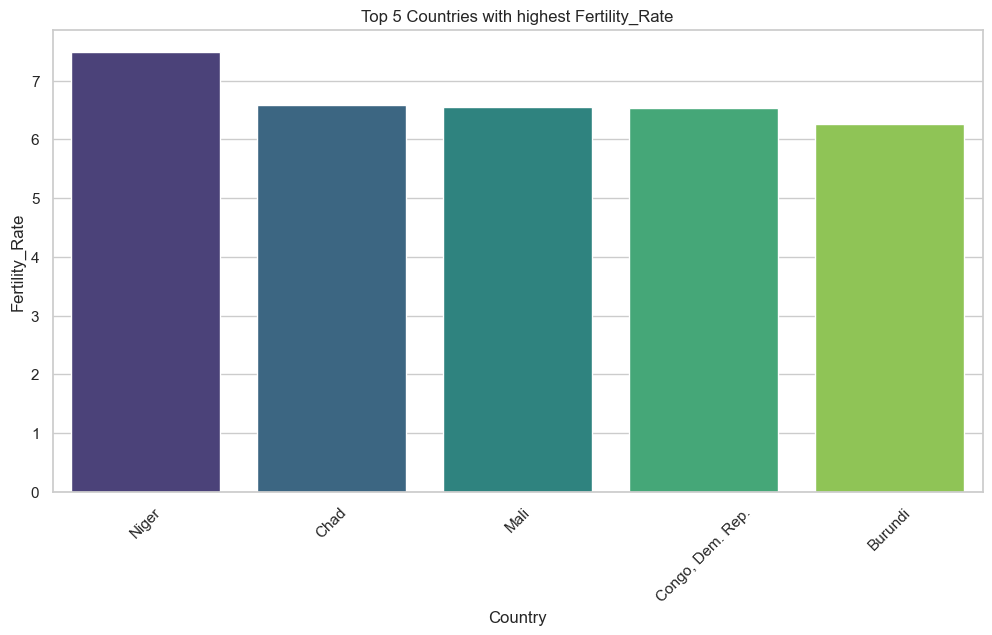

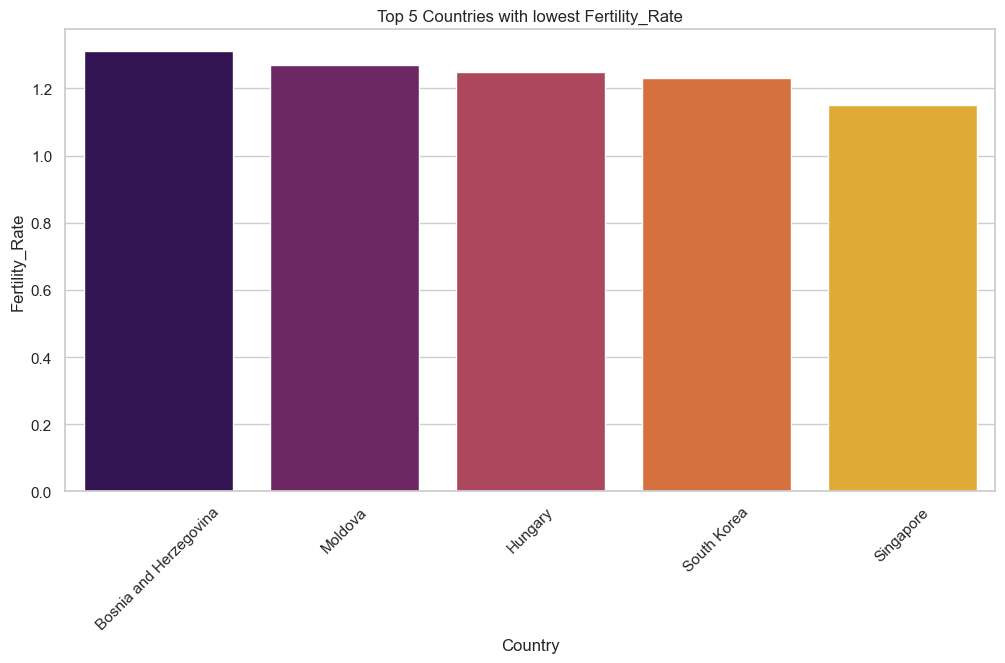

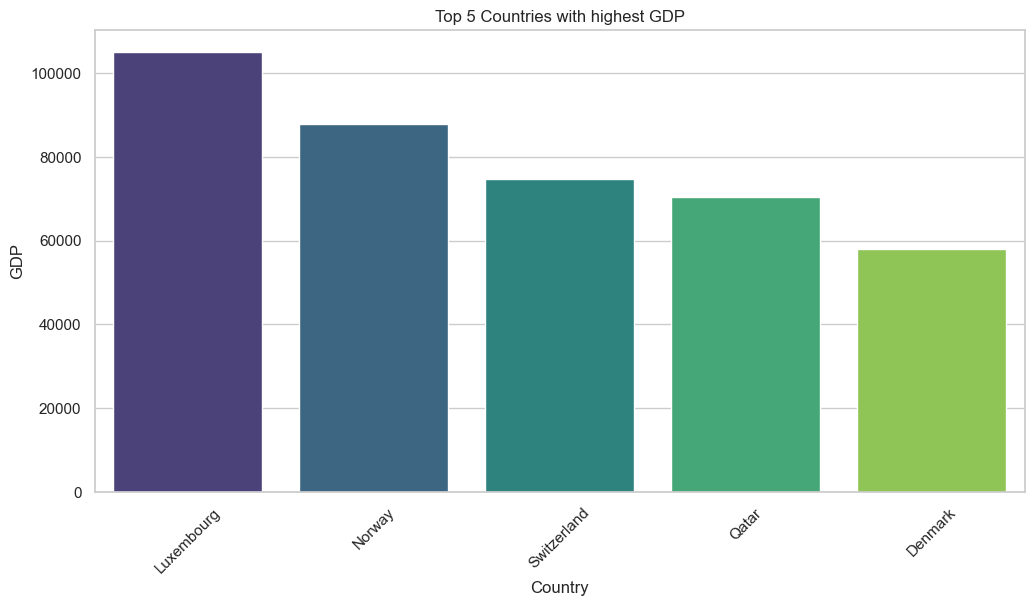

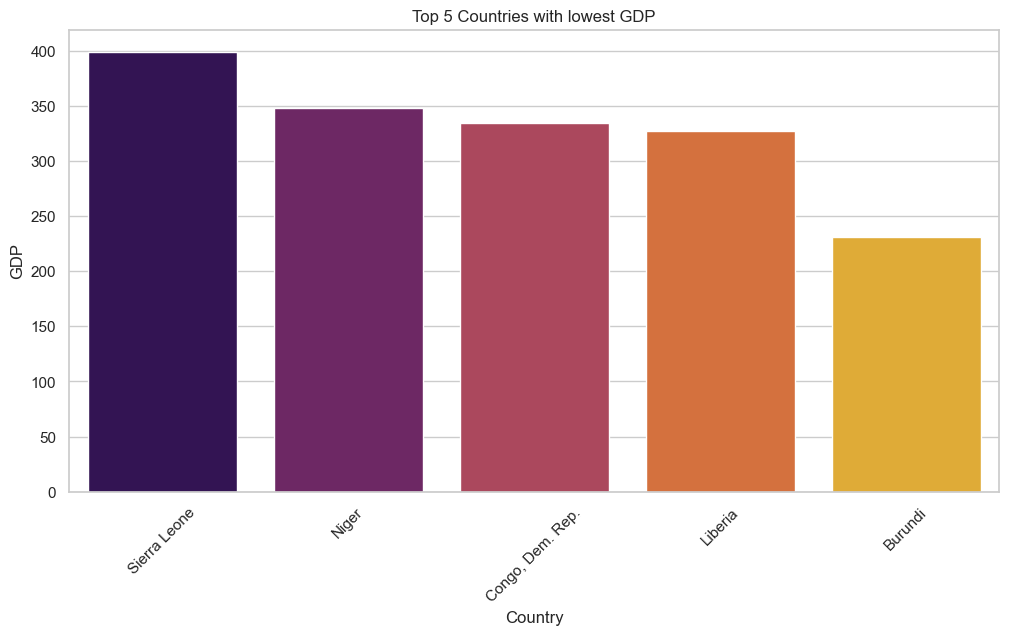

In [16]:
# Now checking the top 5  and bottom 5 countries with each features:

def sorting_countries(cols):
    df_sorted = df.sort_values(by=cols, ascending=False)
    first_five = df_sorted.head()
    last_five = df_sorted.tail()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=cols, data=first_five, palette='viridis')
    plt.title(f'Top 5 Countries with highest {cols}')
    plt.xticks(rotation=45)
    plt.show()
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Country', y=cols, data=last_five, palette='inferno')
    plt.title(f'Top 5 Countries with lowest {cols}')
    plt.xticks(rotation=45)
    plt.show()

for i in df.columns[1:]:
    sorting_countries(i)

## Observations




Looking at the variables it can be said that the country with high child mortality, low income and low life expectancy will need most help.

Most of the countries in the European continent need least help, Many of the countries in the Asian continent may need some help, and Many of the countries in the African continent need the most help.

# Data Preprocessing

## Handling missing values

In [17]:
# Checking what percent of values are missing in each feature.

pd.DataFrame(df.isnull().sum()/len(df)*100, columns=['Missing Value %'], index = df.columns)

Missing Value %
Country                           0.0
Child_Mortality_Rate              0.0
Exports                           0.0
Health                            0.0
Imports                           0.0
Income                            0.0
Inflation                         0.0
Life_Expectancy                   0.0
Fertility_Rate                    0.0
GDP                               0.0

There are no missing values in the data

In [18]:
# Checking the datatypes of the features, in order to convert the same into numeric

pd.DataFrame(df.dtypes, columns= ['Data Type'], index = df.columns)

Data Type
Country                 object
Child_Mortality_Rate   float64
Exports                float64
Health                 float64
Imports                float64
Income                   int64
Inflation              float64
Life_Expectancy        float64
Fertility_Rate         float64
GDP                      int64

## Label Encoding

All the features are in either float or int except for the country data which will not be considering while clustering.

## Handling Outliers

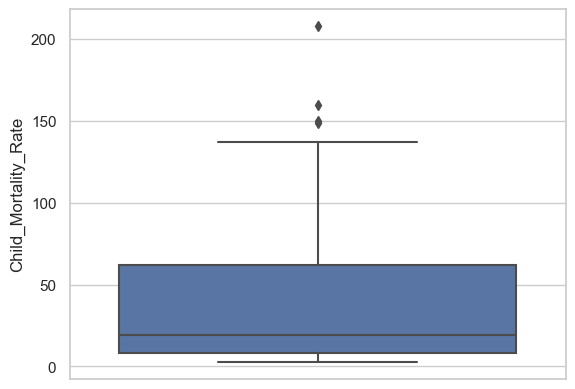

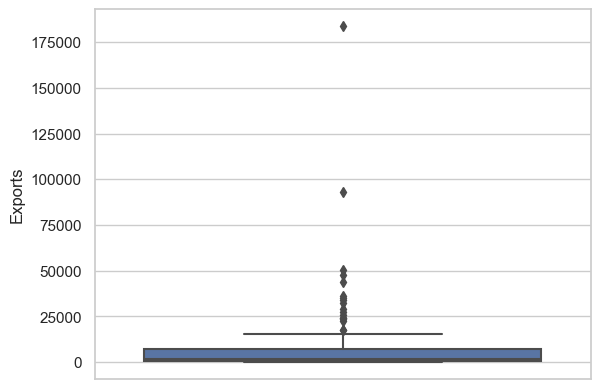

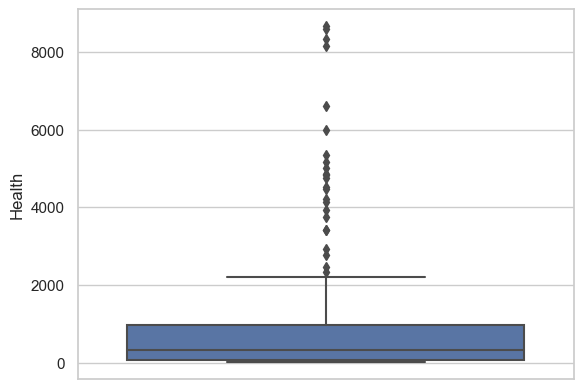

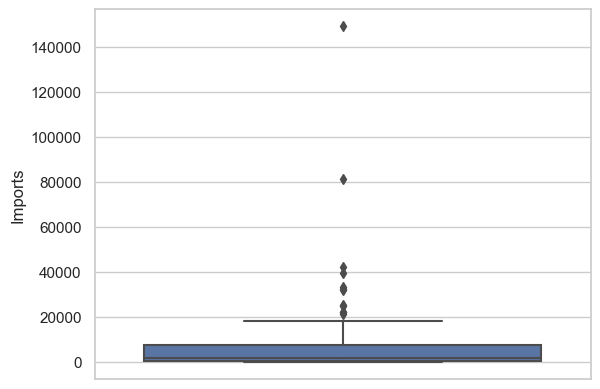

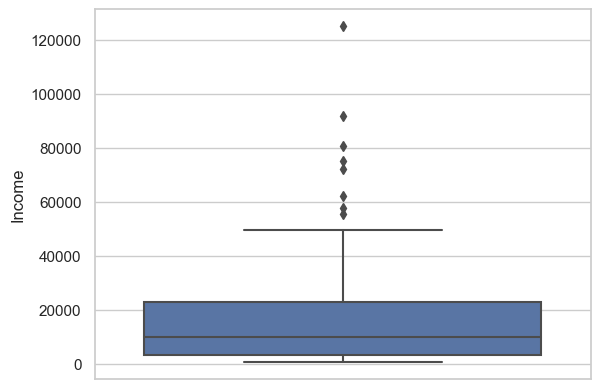

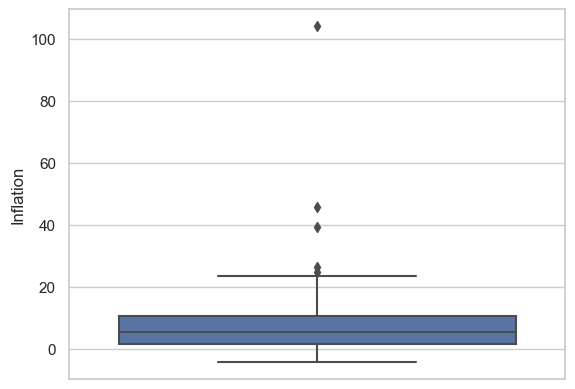

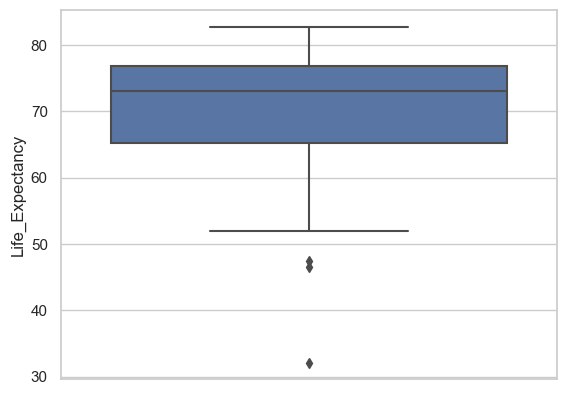

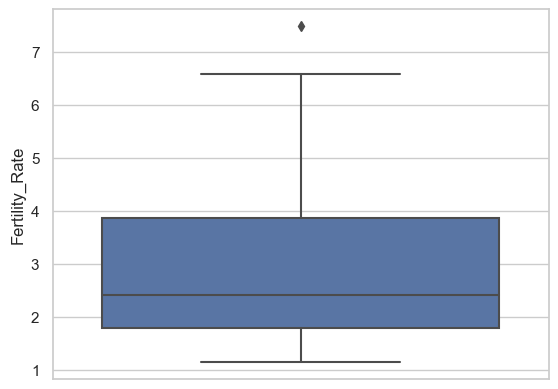

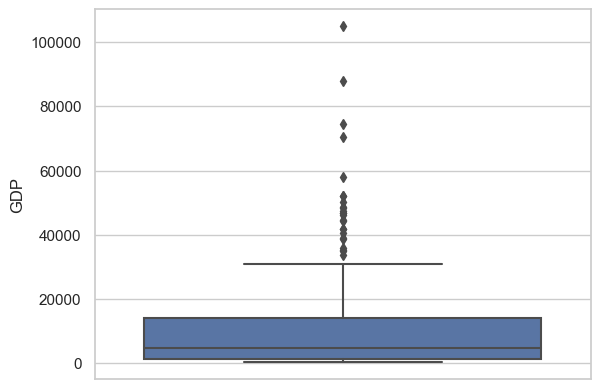

In [19]:
for cols in df.columns[1:]:
    sns.boxplot(y = df[cols])
    plt.show()

In [20]:
# Handling outliers for all features one after the other using capping approach

Capping using the Interquartile Range (IQR) is a method for handling outliers in a dataset. The IQR is a measure of statistical dispersion and is used to identify the spread of the middle 50% of the data. Outliers are often defined as data points that fall below the first quartile (Q1) minus 1.5 times the IQR or above the third quartile (Q3) plus 1.5 times the IQR.

Here's how the capping method using IQR works:

1. Calculate the IQR:
   - IQR = Q3 (75th percentile) - Q1 (25th percentile)

2. Determine the lower and upper bounds for outliers:
   - Lower Bound = Q1 - 1.5 * IQR
   - Upper Bound = Q3 + 1.5 * IQR

3. Any data point below the Lower Bound is considered a lower outlier, and any data point above the Upper Bound is considered an upper outlier.

4. Replace the outlier values with the values of the Lower Bound or Upper Bound, depending on whether they are lower or upper outliers, respectively.

This process effectively "caps" or limits the extreme values in the dataset by replacing them with the nearest non-outlier values. It's a way to mitigate the impact of outliers on statistical analysis without entirely removing them from the dataset.

Keep in mind that the choice of the "1.5 times IQR" multiplier is somewhat arbitrary and can be adjusted depending on the desired level of outlier sensitivity. You can use a larger multiplier like 3 if you want to be more conservative in identifying outliers, or a smaller multiplier like 1 if you want to be more lenient. The specific multiplier depends on the characteristics of your data and the goals of your analysis.

In [21]:
for col in df.columns[1:]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    df[col] = np.where(df[col]<lower_limit, lower_limit, np.where(df[col]>upper_limit, upper_limit, df[col]))

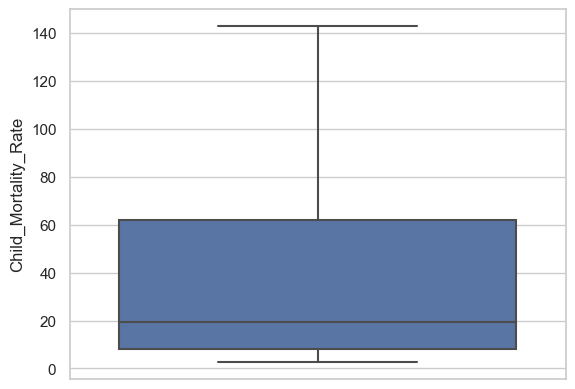

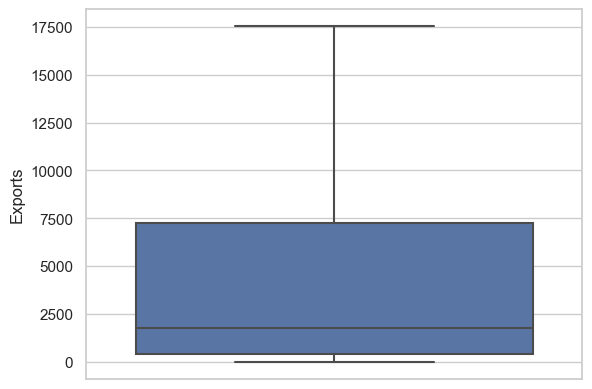

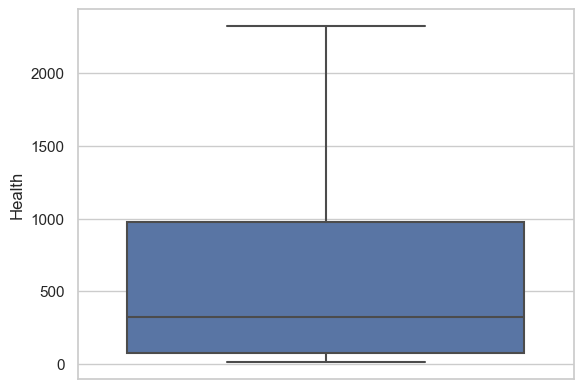

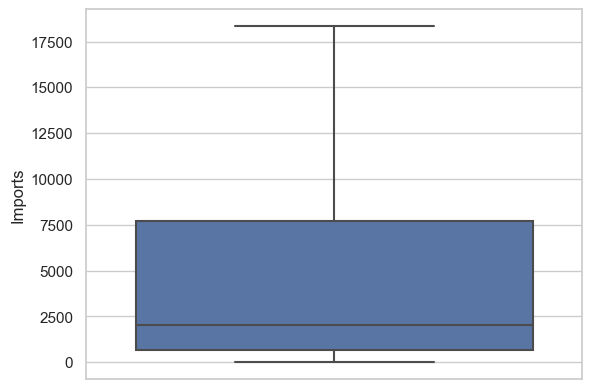

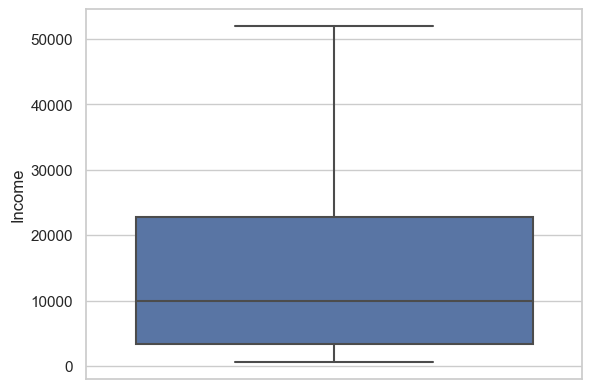

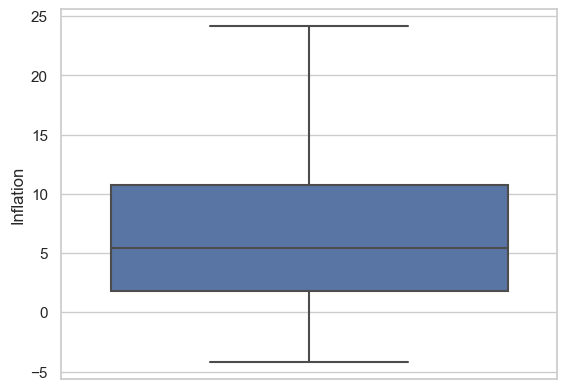

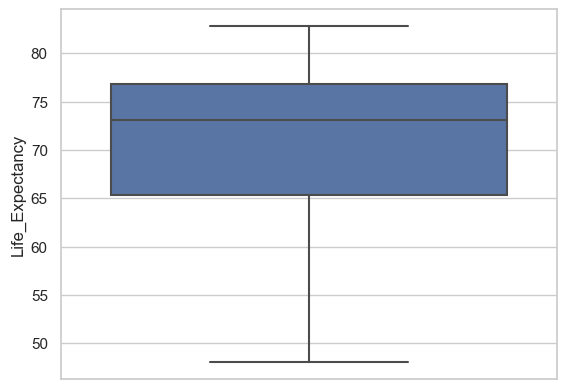

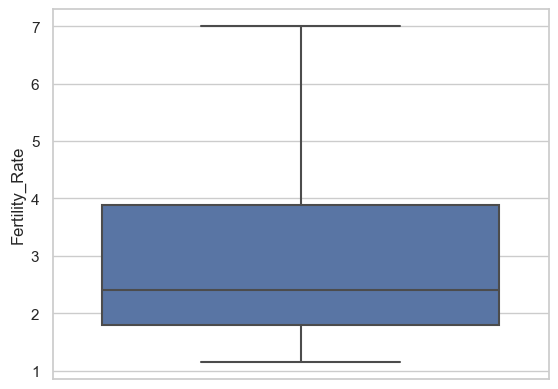

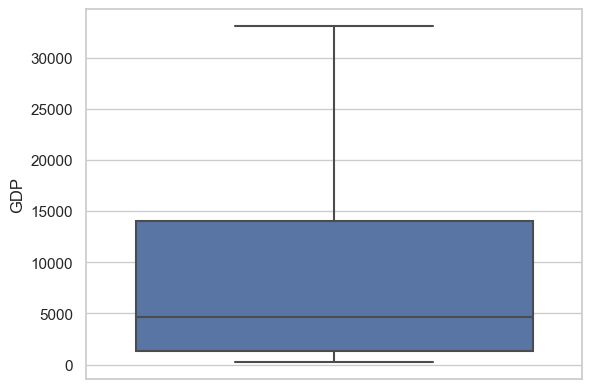

In [22]:
# Confirming that the data is now free from any outliers

for cols in df.columns[1:]:
    sns.boxplot(y = df[cols])
    plt.show()

In [23]:
df.columns

Index(['Country', 'Child_Mortality_Rate', 'Exports', 'Health', 'Imports',
       'Income', 'Inflation', 'Life_Expectancy', 'Fertility_Rate', 'GDP'],
      dtype='object')

In [24]:
# There is a scope of feature engineering in this dataset as the features can be categorized into Health, Trade and Finance
# Where Health includes adding all the data values of features Child_Mortality_Rate, Health, Life_Expectancy, Fertility_Rate
# Trade includes adding the data values of imports and exports
# Finance includes adding up of the data values of income, inflation and GDP

# copying the df as df1 for feature engineering
df1 = df.copy()

# Considering the Total Health
df1['Total_Health'] = (df1['Child_Mortality_Rate']/df1['Child_Mortality_Rate'].mean()) + (df1['Health']/df1['Health'].mean()) + (df1['Life_Expectancy']/df1['Life_Expectancy'].mean()) + (df1['Fertility_Rate']/df1['Fertility_Rate'].mean())
    
# Considering the Total Trade
df1['Total_Trade'] = (df1['Imports']/df1['Imports'].mean()) + (df1['Exports']/df1['Exports'].mean())

# Consodering the Total Finance
df1['Total_Finance'] = (df1['Income']/df1['Income'].mean()) + (df1['Inflation']/df1['Inflation'].mean()) + (df1['GDP']/df1['GDP'].mean())

In [25]:
df1 = df1[['Total_Health', 'Total_Trade', 'Total_Finance']]

In [26]:
df1.head()

Total_Health  Total_Trade  Total_Finance
0      5.225804     0.063936       1.490696
1      2.474181     0.660958       1.654324
2      3.061469     0.657946       3.519904
3      6.246679     0.785177       3.882116
4      3.164770     2.688923       2.582048

In [27]:
df1.describe().T

count  mean       std       min       25%       50%       75%  \
Total_Health   167.0   4.0  1.201967  2.132642  3.014906  3.729633  5.152648   
Total_Trade    167.0   2.0  2.418999  0.000365  0.234646  0.810036  3.012422   
Total_Finance  167.0   3.0  1.998526  0.290160  1.487036  2.355777  4.123776   

                    max  
Total_Health   6.886898  
Total_Trade    7.575077  
Total_Finance  8.828280

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler

# Dropping the feature country from the dataset and renaming it as x:
x = df1.copy()

# Applying scaling using StandardScaler:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [29]:
x_sc_df = pd.DataFrame(x_sc, columns=x.columns)

In [30]:
x_sc_df.head()

Total_Health  Total_Trade  Total_Finance
0      1.022899    -0.802765      -0.757480
1     -1.273253    -0.555217      -0.675360
2     -0.783178    -0.556466       0.260926
3      1.874791    -0.503711       0.442711
4     -0.696976     0.285653      -0.209759

In [31]:
# Building Kmeans cluster

from sklearn.cluster import KMeans

In [32]:
# In order to get what is the best number of clusters we can bifurcate the countries with:

wcss = []
for i in range(1,16):
    km = KMeans(n_clusters=i, n_init='auto', random_state=42)
    km.fit(x_sc)
    wcss.append(km.inertia_)

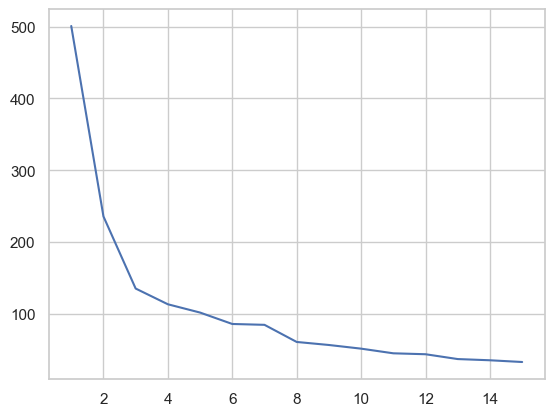

In [33]:
plt.plot(range(1,16), wcss)

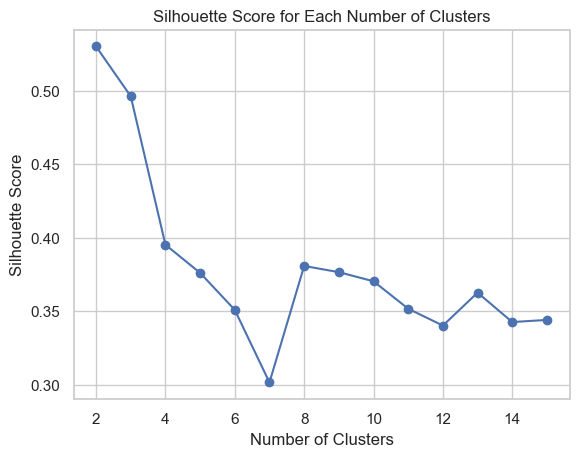

In [34]:
# Similarly to find the best number of clusters by using the Silhoutte Scoring:

from sklearn.metrics import silhouette_score

silhouette_scores = []

cluster_range = range(2, 16)

for n_clusters in cluster_range:
    km = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    km.fit(x_sc)
    cluster_labels = km.predict(x_sc)
    silhouette_avg = silhouette_score(x_sc, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Each Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [35]:
# Since both Elbow curve and Silhoutte Scoring are supporting the value of 3, proceeding with 3 clusters

In [36]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(x_sc)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [37]:
# These are the labels as per the model

kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2,
       2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2])

In [38]:
# Copying df1 to df2 for labeling the clusters for the respective columns

df2 = df1.copy()

In [39]:
df2['Cluster'] = kmeans.labels_

In [40]:
# Shows the clustering for the first 5 rows.

df1.head()

Total_Health  Total_Trade  Total_Finance
0      5.225804     0.063936       1.490696
1      2.474181     0.660958       1.654324
2      3.061469     0.657946       3.519904
3      6.246679     0.785177       3.882116
4      3.164770     2.688923       2.582048

In [41]:
# Trying to plot the clusters:

y_kmeans = kmeans.fit_predict(df1.values)

In [42]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0])

In [43]:
x = df.values

In [44]:
df.columns

Index(['Country', 'Child_Mortality_Rate', 'Exports', 'Health', 'Imports',
       'Income', 'Inflation', 'Life_Expectancy', 'Fertility_Rate', 'GDP'],
      dtype='object')

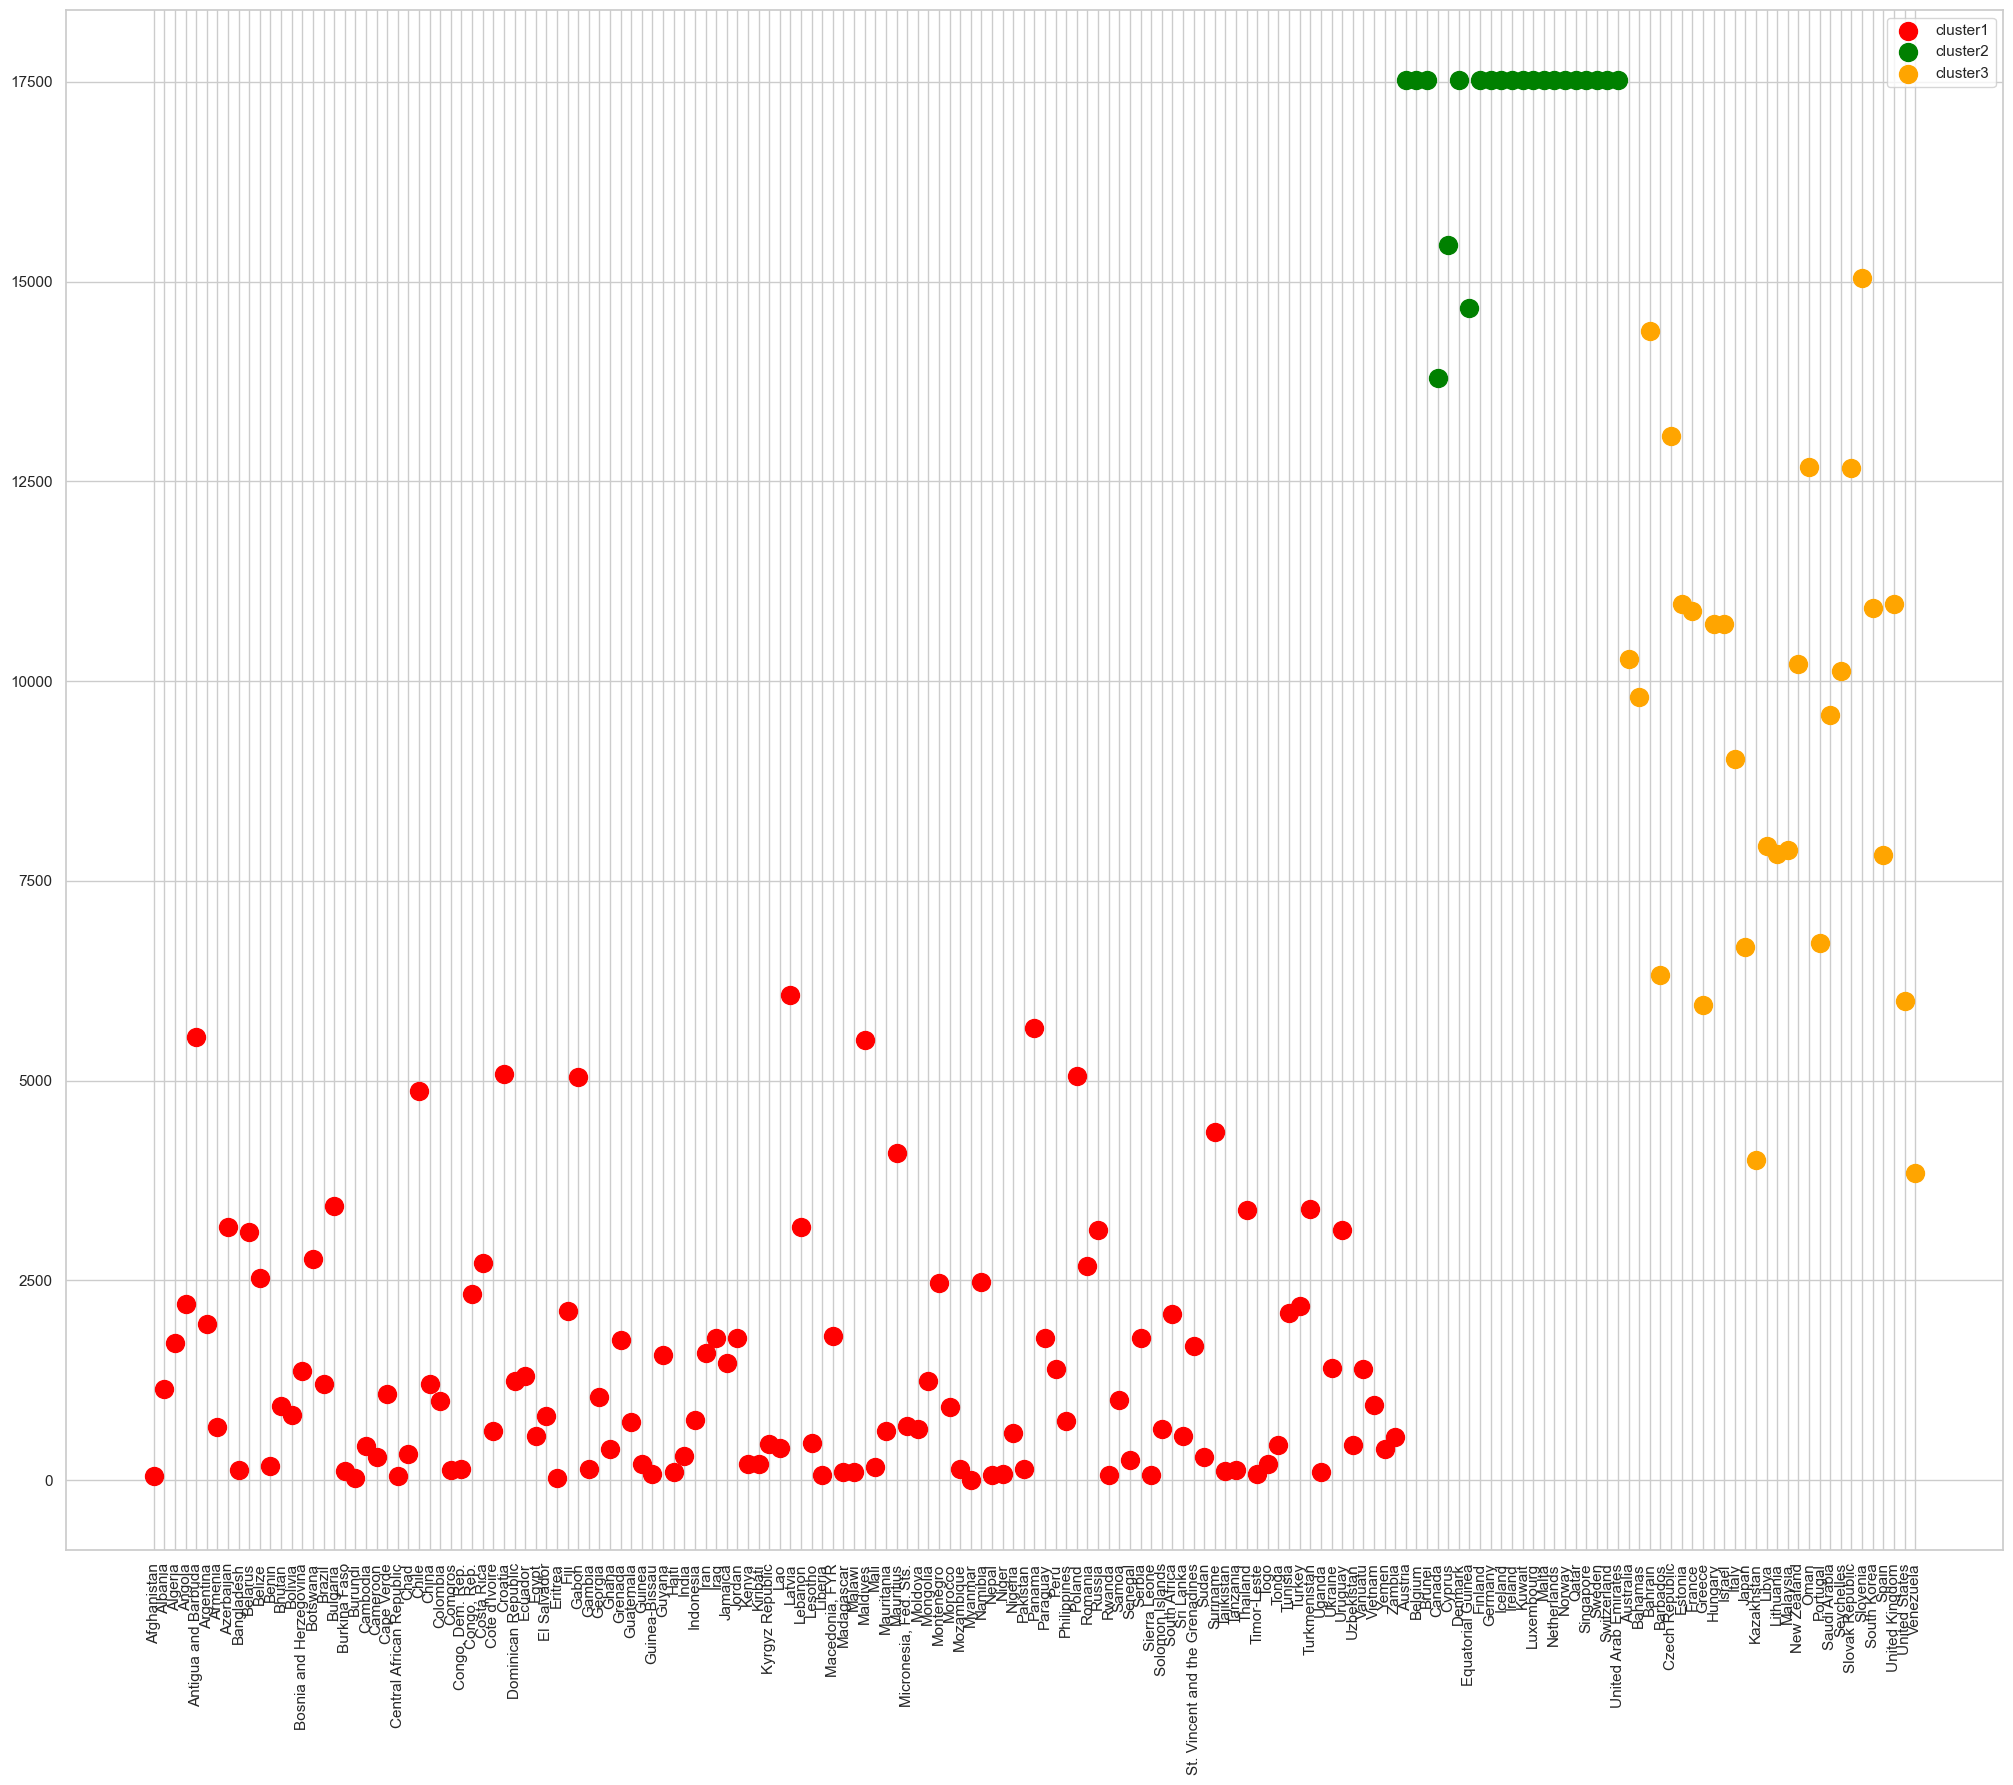

In [45]:
# Plotting the clusters based on the GDP

plt.figure(figsize=(25,20))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,2],c='red',s=167, label = 'cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,2],c='green',s=167, label = 'cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,2],c='orange',s=167, label = 'cluster3')
plt.legend()
plt.xticks(rotation = 90)
plt.show()

## Now plotting the world map to visualise the countries with their grouping:

In [46]:
# Copying the df1 to df3

df3 = df1.copy()

In [47]:
df3['Cluster'] = kmeans.fit_predict(scaler.transform(df3.values))

In [48]:
df3.head()

Total_Health  Total_Trade  Total_Finance  Cluster
0      5.225804     0.063936       1.490696        2
1      2.474181     0.660958       1.654324        0
2      3.061469     0.657946       3.519904        0
3      6.246679     0.785177       3.882116        2
4      3.164770     2.688923       2.582048        0

In [49]:
# First getting the Country names in the df1 dataframe:

df3['Country'] = df['Country']
df3 = df3[['Country','Total_Health', 'Total_Trade', 'Total_Finance', 'Cluster']]
df3.head()

Country  Total_Health  Total_Trade  Total_Finance  Cluster
0          Afghanistan      5.225804     0.063936       1.490696        2
1              Albania      2.474181     0.660958       1.654324        0
2              Algeria      3.061469     0.657946       3.519904        0
3               Angola      6.246679     0.785177       3.882116        2
4  Antigua and Barbuda      3.164770     2.688923       2.582048        0

In [50]:
# Now to plot the countries grouped, need to get their respective ISO Codes:

import pycountry

def get_iso_code(country_name):
    try:
        iso_code = pycountry.countries.get(name = country_name).alpha_3
        return iso_code
    except Exception as e:
        return None

In [51]:
df3['ISO_Code'] = df3['Country'].apply(get_iso_code)

In [52]:
df3[['Country', 'ISO_Code']]

Country ISO_Code
0                       Afghanistan      AFG
1                           Albania      ALB
2                           Algeria      DZA
3                            Angola      AGO
4               Antigua and Barbuda      ATG
5                         Argentina      ARG
6                           Armenia      ARM
7                         Australia      AUS
8                           Austria      AUT
9                        Azerbaijan      AZE
10                          Bahamas      BHS
11                          Bahrain      BHR
12                       Bangladesh      BGD
13                         Barbados      BRB
14                          Belarus      BLR
15                          Belgium      BEL
16                           Belize      BLZ
17                            Benin      BEN
18                           Bhutan      BTN
19                          Bolivia     None
20           Bosnia and Herzegovina      BIH
21                         Botswana      BWA
22                           Brazil      BRA
23                           Brunei     None
24                         Bulgaria      BGR
25                     Burkina Faso      BFA
26                          Burundi      BDI
27                         Cambodia      KHM
28                         Cameroon      CMR
29                           Canada      CAN
30                       Cape Verde     None
31         Central African Republic      CAF
32                             Chad      TCD
33                            Chile      CHL
34                            China      CHN
35                         Colombia      COL
36                          Comoros      COM
37                 Congo, Dem. Rep.     None
38                      Congo, Rep.     None
39                       Costa Rica      CRI
40                    Cote d'Ivoire     None
41                          Croatia      HRV
42                           Cyprus      CYP
43                   Czech Republic     None
44                          Denmark      DNK
45               Dominican Republic      DOM
46                          Ecuador      ECU
47                            Egypt      EGY
48                      El Salvador      SLV
49                Equatorial Guinea      GNQ
50                          Eritrea      ERI
51                          Estonia      EST
52                             Fiji      FJI
53                          Finland      FIN
54                           France      FRA
55                            Gabon      GAB
56                           Gambia      GMB
57                          Georgia      GEO
58                          Germany      DEU
59                            Ghana      GHA
60                           Greece      GRC
61                          Grenada      GRD
62                        Guatemala      GTM
63                           Guinea      GIN
64                    Guinea-Bissau      GNB
65                           Guyana      GUY
66                            Haiti      HTI
67                          Hungary      HUN
68                          Iceland      ISL
69                            India      IND
70                        Indonesia      IDN
71                             Iran     None
72                             Iraq      IRQ
73                          Ireland      IRL
74                           Israel      ISR
75                            Italy      ITA
76                          Jamaica      JAM
77                            Japan      JPN
78                           Jordan      JOR
79                       Kazakhstan      KAZ
80                            Kenya      KEN
81                         Kiribati      KIR
82                           Kuwait      KWT
83                  Kyrgyz Republic     None
84                              Lao     None
85                           Latvia      LVA
86                          Lebanon      LBN
87                          Lesotho      LSO
88                     

In [53]:
df3.columns

Index(['Country', 'Total_Health', 'Total_Trade', 'Total_Finance', 'Cluster',
       'ISO_Code'],
      dtype='object')

In [54]:
df3[df3['Cluster'] == 0]['Country']

1                             Albania
2                             Algeria
4                 Antigua and Barbuda
5                           Argentina
6                             Armenia
9                          Azerbaijan
12                         Bangladesh
13                           Barbados
14                            Belarus
16                             Belize
18                             Bhutan
19                            Bolivia
20             Bosnia and Herzegovina
21                           Botswana
22                             Brazil
24                           Bulgaria
27                           Cambodia
30                         Cape Verde
33                              Chile
34                              China
35                           Colombia
38                        Congo, Rep.
39                         Costa Rica
41                            Croatia
45                 Dominican Republic
46                            Ecuador
47          

In [55]:
import plotly.express as px

fig = px.choropleth(data_frame=df3, locations='ISO_Code', color='Cluster', color_continuous_scale=['orange', 'green', 'red'],
                   projection='natural earth', title='K-Means Clustering of Countries')
fig.update_geos(showcoastlines = True, coastlinecolor = 'black', showland = True, landcolor = 'white')
fig.show()

## Observation:

### In the above plot, countries in red need the most help, countries in orange needs moderate help and countries in green need least ot no help.

### Please Note: This visualization and clustering is with respect to the data used in the dataset and does not represent the real time status of the countries.

# Building Hierarchical Cluster for the same data

# Hierarchical Clustering and Dendrogram understanding:

Hierarchical clustering is a type of clustering algorithm used to group data points into a hierarchy of clusters. It creates a tree-like structure of nested clusters, making it easy to visualize the relationships between data points at different levels of granularity. Hierarchical clustering can be categorized into two main types: Agglomerative (bottom-up) and Divisive (top-down).

1. **Agglomerative Hierarchical Clustering**:
   - **Process**: It starts by treating each data point as a single cluster and then repeatedly merges the closest pairs of clusters until only one cluster remains. The merging process continues until a stopping criterion is met.
   - **Advantages**:
     - Simplicity: It is conceptually simple and easy to understand.
     - Hierarchy: It provides a hierarchy of clusters, allowing for a wide range of granularity.
     - No need to specify the number of clusters in advance.
   - **Disadvantages**:
     - Computationally intensive, especially for large datasets.
     - Not suitable for very large datasets due to its time complexity.

2. **Divisive Hierarchical Clustering**:
   - **Process**: It starts with all data points in a single cluster and then recursively splits clusters into smaller ones, typically by selecting a cluster and dividing it into two based on some criterion. This process continues until a stopping criterion is met.
   - **Advantages**:
     - Flexibility: Allows for different strategies to divide clusters.
     - Can be more computationally efficient than agglomerative clustering for large datasets.
   - **Disadvantages**:
     - Requires defining a stopping criterion, which may be subjective.
     - Produces a static hierarchy and may not be as intuitive as agglomerative clustering.

**Dendrogram**:
A dendrogram is a tree-like diagram that represents the hierarchy of clusters in hierarchical clustering. It visually shows the order in which clusters are merged or split during the clustering process. The vertical lines in a dendrogram represent individual data points, while horizontal lines and the height at which they merge or split indicate the level of similarity between clusters. Dendrograms help in visualizing the hierarchical structure of the data and determining the optimal number of clusters.

**Using Dendrograms for Clustering**:
Dendrograms are useful for several purposes in hierarchical clustering:

1. **Determination of the Number of Clusters**: By examining the dendrogram, you can identify the number of clusters that best suit your data. The vertical lines in the dendrogram show how many clusters result from cutting the tree at a certain height.

2. **Visualizing Data Relationships**: Dendrograms allow you to see how data points are grouped and at what level of similarity.

3. **Understanding Hierarchical Structure**: Dendrograms help in understanding the hierarchical structure of the data, which can be valuable in exploratory data analysis.

To use a dendrogram to cluster your data:

1. Perform hierarchical clustering, either agglomerative or divisive, to create the dendrogram.

2. Examine the dendrogram and decide at what level (height) to cut the tree to obtain the desired number of clusters.

3. Cut the dendrogram at the chosen height to obtain the final clusters.

Hierarchical clustering and dendrograms are particularly useful when you don't know the number of clusters in advance and want to explore the data's inherent structure. They provide a visual representation of how data points group together at different levels of similarity.

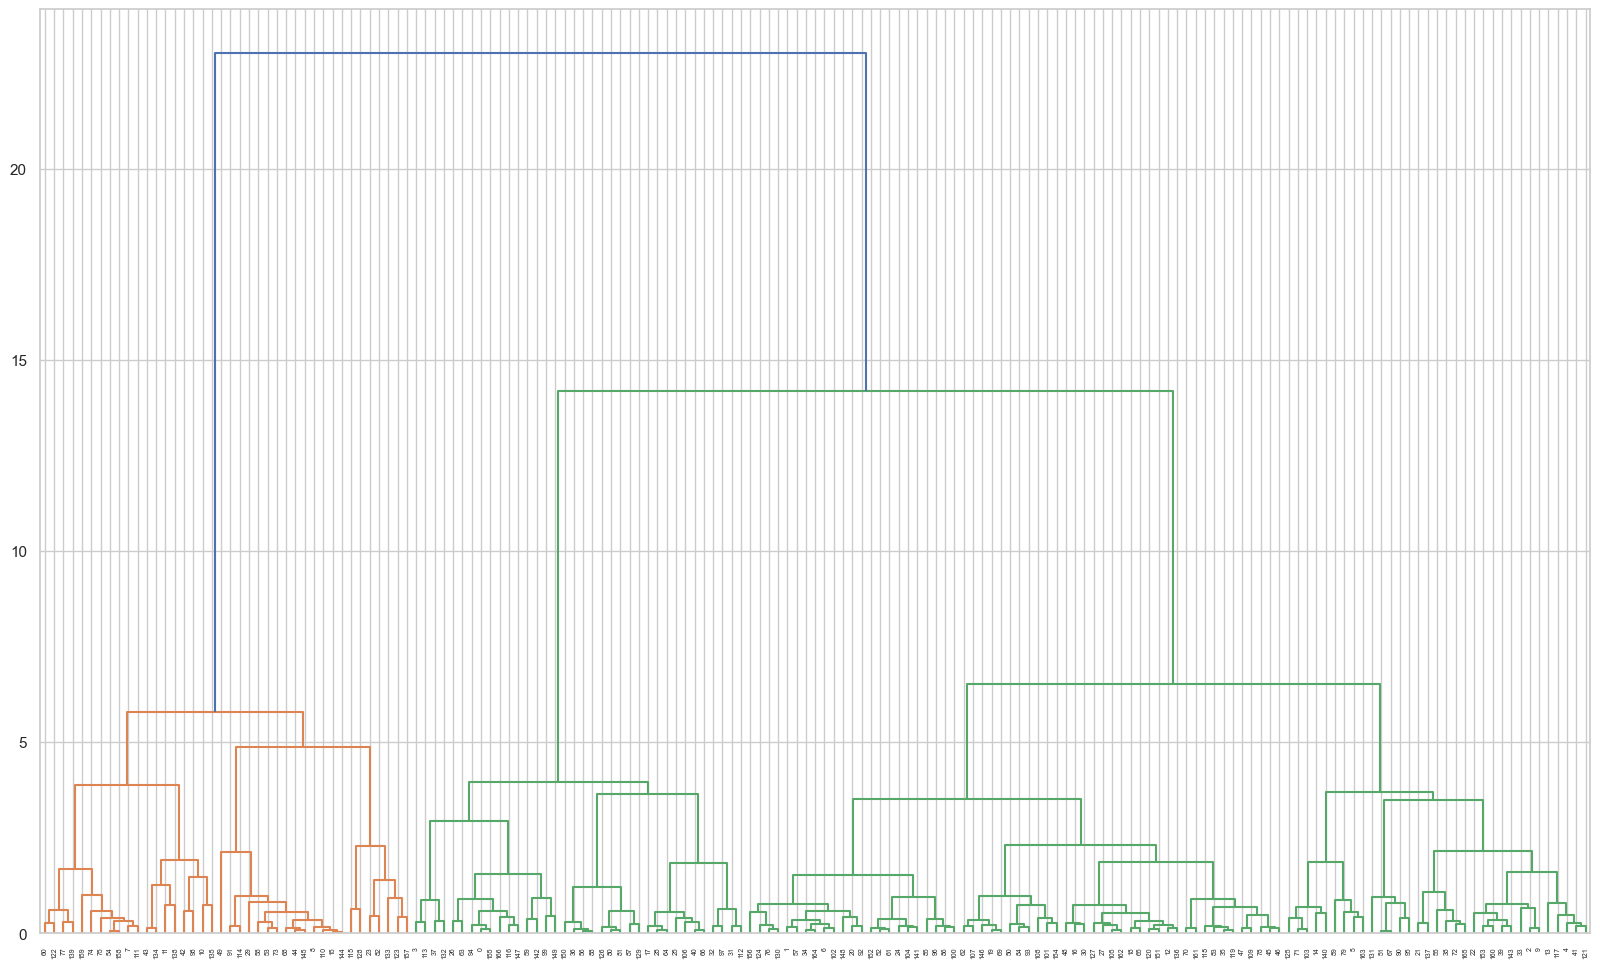

In [56]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,12))
dendrogram = sch.dendrogram(sch.linkage(x_sc, method='ward'))
plt.show()

# Observation:

### With the help of the above visualisation it can be observed that the better clustering method is to split the data points into 3 clusters as they seem to be significantly seperable compared to higher number of clustering.  